<a href="https://colab.research.google.com/github/shourya03roy/Crop-Pattern-Prediction/blob/main/Crop_Pattern_Prediction(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# plt.style.use('./deeplearning.mplstyle')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop_recommendation.csv')
label = data['label'].unique()
data['label'] = data['label'].replace({'rice' : 0, 'maize': 1, 'chickpea' : 2, 'kidneybeans' : 3, 'pigeonpeas' : 4,'mothbeans' : 5, 'mungbean' : 6, 'blackgram' : 7, 'lentil' : 8, 'pomegranate' : 9, 'banana' : 10, 'mango' : 11, 'grapes' : 12, 'watermelon' : 13, 'muskmelon' : 14, 'apple' : 15, 'orange' : 16, 'papaya' : 17, 'coconut' : 18, 'cotton' : 19, 'jute' : 20, 'coffee' : 21})
X_train, X_test, y_train, y_test = train_test_split(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']],data['label'], test_size=0.2,shuffle=True)
scaler = StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_
X_scaled = np.array(scaler.transform(X_train))
tscaler = StandardScaler().fit(X_test)
tscaler.mean_
tscaler.scale_
X_tscaled = np.array(scaler.transform(X_test))
print(label)
X_scaled,y_train,X_tscaled,y_test

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


(array([[-1.12957869,  0.08408619, -0.61643661, ..., -0.19939394,
         -0.2621869 , -1.03019041],
        [ 0.89211088,  0.20634285, -0.23480854, ...,  0.39590917,
          0.55838   ,  1.74136277],
        [-0.91101765,  2.52921943,  2.97890153, ...,  0.85686239,
         -0.74756555, -0.01438096],
        ...,
        [-1.15689882, -0.92453127, -0.07412304, ...,  0.82079414,
          0.84830718,  0.08295951],
        [-0.3919352 ,  0.45085617, -0.55617955, ..., -2.11371077,
         -0.77022078, -0.39541909],
        [-0.91101765,  2.4680911 ,  3.13958703, ...,  0.39763826,
          0.04156249, -0.5381613 ]]),
 881      8
 42       0
 1564    15
 557      5
 1208    12
         ..
 1395    13
 202      2
 928      9
 378      3
 1209    12
 Name: label, Length: 1760, dtype: int64,
 array([[ 0.18178752,  0.20634285, -0.61643661, ..., -0.14987682,
          1.32600294, -0.54351275],
        [-0.61049623,  0.66480533, -0.53609386, ..., -0.92177555,
         -0.58735973,  0.187217

In [ ]:
model = LogisticRegression(multi_class='multinomial',solver='saga', C=0.325, max_iter= 100, penalty= 'l2')
model = model.fit(X_scaled, y_train)

In [ ]:
y_pred = model.predict(X_scaled)
print(metrics.accuracy_score(y_train,y_pred)*100)

96.13636363636363


In [ ]:
y_tpred = model.predict(X_tscaled)
print(metrics.accuracy_score(y_test, y_tpred)*100)

97.95454545454545


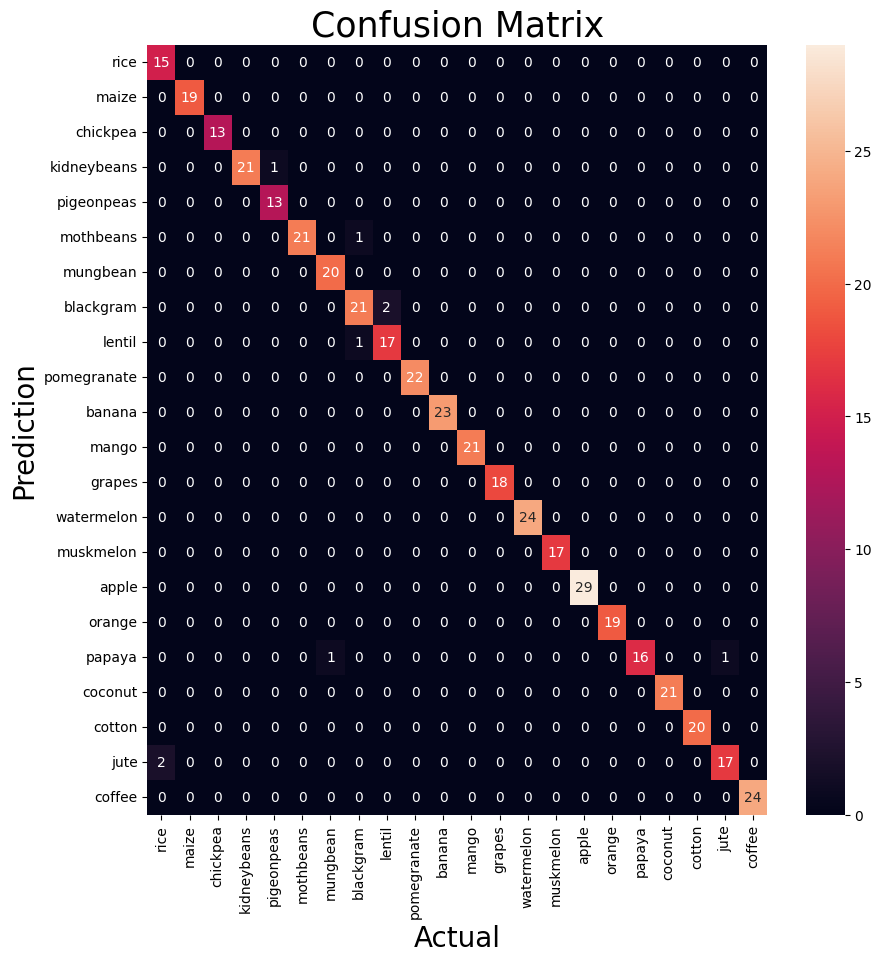

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#compute the confusion matrix.
cm = confusion_matrix(y_test,y_tpred)
# for i in range(22):
#     sum = np.sum
#     for j in range(22)
#         cm[i] = cm[i]/np.sum(cm[i])
# Plot the confusion matrix.
plt.figure(figsize = (10,10))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=label,
            yticklabels=label)
plt.ylabel('Prediction',fontsize=20)
plt.xlabel('Actual',fontsize=20)
plt.title('Confusion Matrix',fontsize=25)

plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_tpred,average="weighted")
recall = recall_score(y_test, y_tpred,average="weighted")
print("Precision: ", precision*100)
print("Recall: ", recall*100)

Precision:  98.04637484978043
Recall:  97.95454545454545
